In [8]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import glob

TEAMNAME = 'England'

#マスタデータのインポート
master = pd.read_csv(os.getcwd() + "/Resources/RugbyHub_master_data.csv",dtype=str)

df = pd.read_csv("/Users/isakakou/Desktop/Optaデータ関連/Six Nations BI CSV Files Apr 2025/941791_IRELvENGL_BI.csv",encoding='latin1')
df.columns
df[['playerName', 'teamName','x_coord','y_coord','x_coord_end','y_coord_end',
    'actionName','ActionTypeName','ActionResultName','qualifier3Name',
    'qualifier4Name','qualifier5Name','Metres','PlayNum',
    'SetNum','sequence_id','playerpositionName','refereeName','assistantreferee1Name','assistantreferee2Name']]
print(df.action)

0       17
1       14
2       18
3        3
4       18
        ..
3742    10
3743     9
3744    15
3745    26
3746    11
Name: action, Length: 3747, dtype: int64


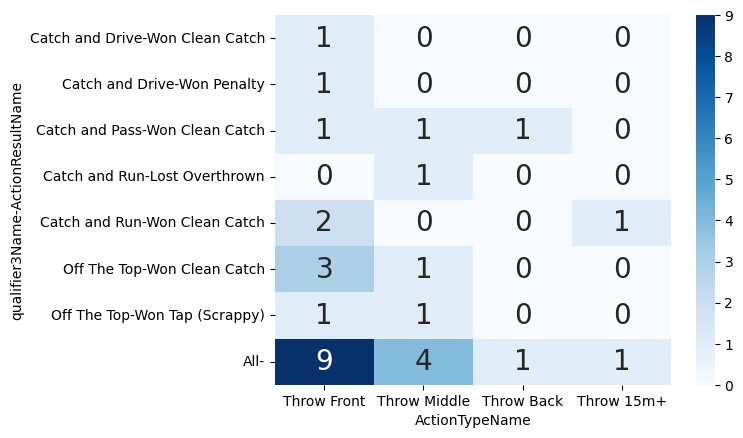

<Figure size 640x480 with 0 Axes>

In [9]:
#チーム名指定でラインアウトデータ取得
df = df.loc[(df['teamName'] == TEAMNAME)]

dfaction = df.loc[df['actionName'] == 'Lineout Throw']
b = pd.crosstab([dfaction['qualifier3Name'],dfaction['ActionResultName']],dfaction['ActionTypeName'],margins=True)
b = b.reindex(columns=['Throw Front', 'Throw Middle', 'Throw Back', 'Throw 15m+'])

plt.gcf().subplots_adjust(wspace=4)
sns.heatmap(b,cmap='Blues', annot=True,annot_kws={'size':20})
plt.show()
plt.clf()

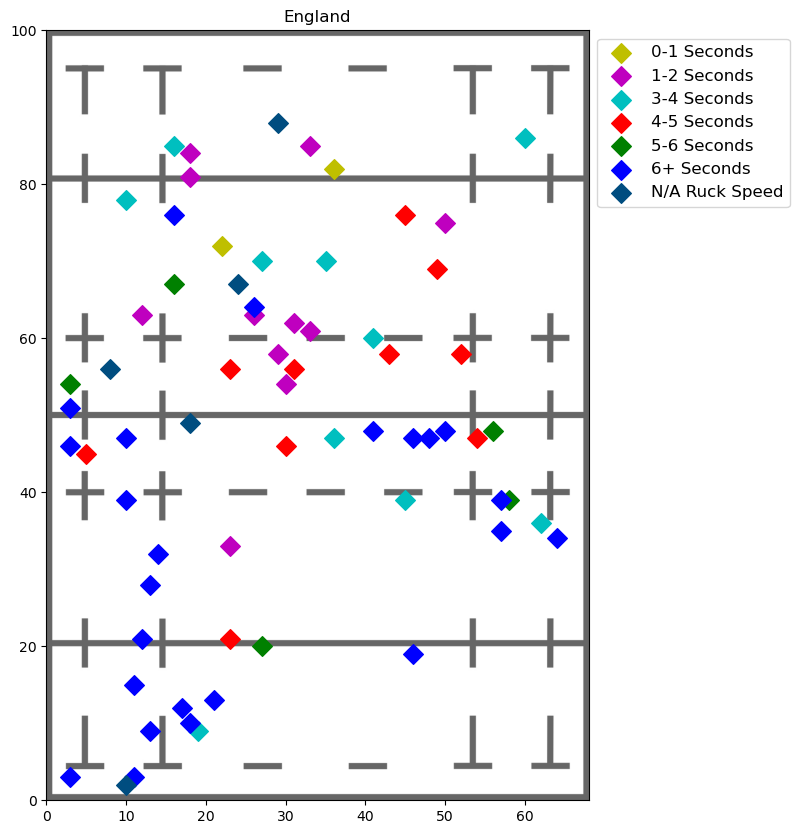

In [13]:
dfaction = df.loc[(df['teamName'] == TEAMNAME)]

dfaction = dfaction.loc[dfaction['actionName'] == 'Ruck']
rspeed = ['0-1 Seconds','1-2 Seconds','3-4 Seconds','4-5 Seconds','5-6 Seconds','6+ Seconds', "N/A Ruck Speed"]
cl = ['y','m', 'c', 'r', 'g', 'b', (0,0.3,0.5), (0,0,0)]
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(1, 1,1)
plt.xlim(0, 68)
plt.ylim(0,100)

for i in range(len(rspeed)):
    r = dfaction.loc[dfaction['qualifier4Name'] == rspeed[i]]
    plt.scatter(r['y_coord'], r["x_coord"], label=rspeed[i] ,marker = 'D',color=cl[i], s=100)

#背景画像の設定
fig.patch.set_facecolor('white')
im = Image.open(os.getcwd()+"/Resources/FIELD_image.jpeg")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.imshow(im, extent=[*xlim, *ylim], aspect='auto', alpha=0.6)

#ラベルの表示
plt.title(TEAMNAME)
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)
plt.gcf().subplots_adjust(wspace=4)


           playerName  MatchTime ActionTypeName
18       Marcus Smith         13            Low
93      Alex Mitchell        131            Box
201      Marcus Smith        239    Cross Pitch
286     Alex Mitchell        512            Box
366      Marcus Smith        556           Bomb
490     Alex Mitchell        753            Box
561       Henry Slade        837            Low
847     Alex Mitchell       1651            Box
1018    Tommy Freeman       1954            Low
1076    Alex Mitchell       2127            Box
1104    Tommy Freeman       2203    Territorial
1136     Marcus Smith       2303           Bomb
1324  Freddie Steward       2643     Touch Kick
1366    Alex Mitchell       2725            Box
1528    Alex Mitchell       3014            Box
1690    Alex Mitchell       3253            Box
1861      Henry Slade       3647            Low
2038    Alex Mitchell       4020            Box
2347    Alex Mitchell       4922            Box
2391    Tommy Freeman       4955     Tou

ActionResultName                Caught Full  Collected Bounce  \
playerName      ActionTypeName                                  
Alex Mitchell   Box                       6                 1   
Fin Smith       Touch Kick                0                 0   
Freddie Steward Low                       0                 1   
                Touch Kick                0                 0   
Harry Randall   Box                       2                 1   
Henry Slade     Low                       0                 0   
Marcus Smith    Bomb                      1                 0   
                Cross Pitch               0                 0   
                Low                       0                 1   
                Territorial               1                 1   
                Touch Kick                0                 0   
Tommy Freeman   Low                       0                 0   
                Territorial               0                 1   
                Touch Kick                0                 0   

ActionResultName                Error - Charged Down  Error - Out of Play  \
playerName      ActionTypeName                                              
Alex Mitchell   Box                                0                    0   
Fin Smith       Touch Kick                         0                    0   
Freddie Steward Low                                0                    0   
                Touch Kick                         0                    0   
Harry Randall   Box                                1                    0   
Henry Slade     Low                                0                    0   
Marcus Smith    Bomb                               0                    0   
                Cross Pitch                        0                    1   
                Low                                0                    0   
                Territorial                        0                    0   
                Touch Kick                         0                    0   
Tommy Freeman   Low                                0                    1   
                Territorial                        0                    0   
                Touch Kick                         0                    0   

ActionResultName                Kick in Touch (Bounce)  Kick in Touch (Full)  \
playerName      ActionTypeName                                                 
Alex Mitchell   Box                                  0                     3   
Fin Smith       Touch Kick                           0                     1   
Freddie Steward Low                                  0                     0   
                Touch Kick                           0                     2   
Harry Randall   Box                                  0                     1   
Henry Slade     Low                                  1                     0   
Marcus Smith    Bomb                                 0                     0   
                Cross Pitch                          0                     0   
                Low                                  1                     0   
                Territorial                          0                     0   
                Touch Kick                           0                     1   
Tommy Freeman   Low                                  0                     0   
                Territorial                          0                     0   
                Touch Kick                           0                     1   

ActionResultName                Own Player - Collected  Own Player - Failed  \
playerName      ActionTypeName                                                
Alex Mitchell   Box                                  0                    1   
Fin Smith       Touch Kick                           0                    0   
Freddie Steward Low                                  0                    0   
                Touch Kick                        

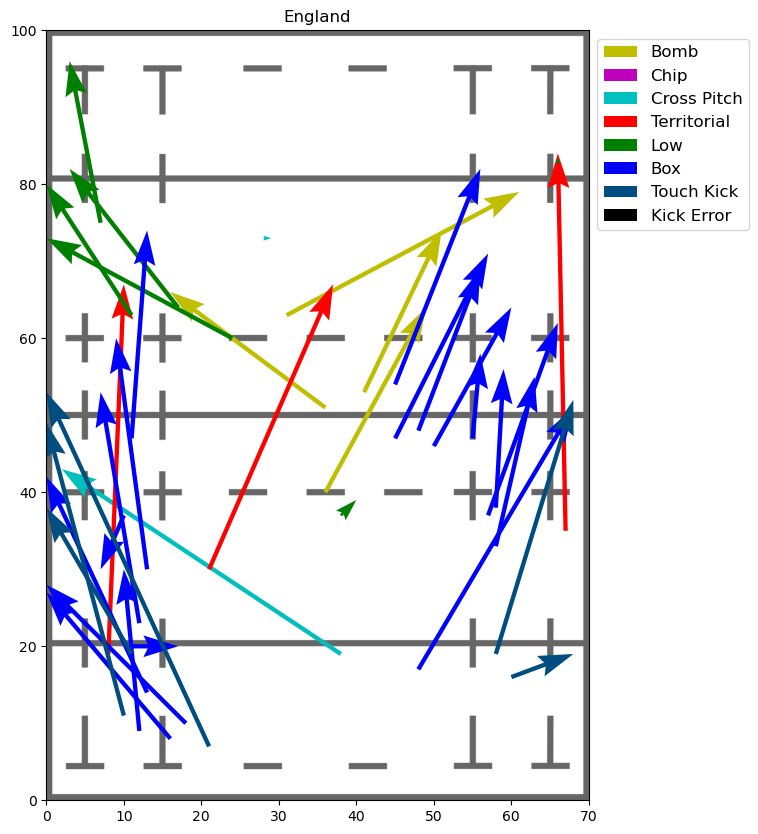

In [14]:
#Kickが入力された場合の処理-----
dfaction = df.loc[(df['teamName'] == TEAMNAME)]

dfaction = dfaction.loc[dfaction['actionName'] == 'Kick']
kicktypes = ['Bomb', 'Chip', 'Cross Pitch', 'Territorial', 'Low', 'Box', 'Touch Kick','Kick Error']
kicks = dfaction.loc[dfaction['qualifier3'] != 148]

cl = ['y','m', 'c', 'r', 'g', 'b', (0,0.3,0.5), (0,0,0)]
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(1, 1,1)
plt.xlim(0, 70)
plt.ylim(0,100)

print(kicks[['playerName','MatchTime','ActionTypeName']])
for i in range(len(kicktypes)):
    plts = kicks.loc[kicks['ActionTypeName']== kicktypes[i]]
    plt.quiver(plts['y_coord'], plts["x_coord"], (plts['y_coord_end']-plts['y_coord']), (plts["x_coord_end"]-plts['x_coord']), angles="xy", scale_units='xy',label= kicktypes[i], color = cl[i], scale=1,width=0.008, headwidth=5, headlength = 8, headaxislength = 7, pivot='tail')
#Kickの処理ここまで------

#背景画像の設定
fig.patch.set_facecolor('white')
im = Image.open(os.getcwd()+"/Resources/FIELD_image.jpeg")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.imshow(im, extent=[*xlim, *ylim], aspect='auto', alpha=0.6)

#ラベルの表示
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)
plt.title(TEAMNAME)
plt.gcf().subplots_adjust(wspace=4)

#表を出力
player_kicks = pd.crosstab([kicks['playerName'],kicks['ActionTypeName']],kicks['ActionResultName'])
player_kicks

In [15]:
dfaction = df.loc[(df['teamName'] == TEAMNAME)]
dfaction = dfaction.loc[dfaction['actionName'] == 'Tackle']
dfaction[['playerName','actionName','ActionResultName','ActionTypeName','qualifier3Name','qualifier4Name','qualifier5Name']]

,playerName,actionName,ActionResultName,ActionTypeName,qualifier3Name,qualifier4Name,qualifier5Name
30,Ben Curry,Tackle,Complete,Line,NaN,Neutral Tackle,1st Tackler
32,George Martin,Tackle,Complete,Line,Assist,Neutral Tackle,2nd Tackler
97,Cadan Murley,Tackle,Sack,Chase,NaN,Dominant Tackle,1st Tackler
218,Luke Cowan-Dickie,Tackle,Missed,Other,NaN,Ineffective Tackle,1st Tackler
222,Maro Itoje,Tackle,Passive,Cover,Assist,Ineffective Tackle,2nd Tackler
...,...,...,...,...,...,...,...
3629,Ollie Chessum,Tackle,Complete,Edge,Assist,Neutral Tackle,2nd Tackler
3639,Fin Baxter,Tackle,Complete,Line,NaN,Neutral Tackle,1st Tackler
3652,Ollie Chessum,Tackle,Offload Allowed,Edge,NaN,Ineffective Tackle,1st Tackler
3656,Marcus Smith,Tackle,Sack,Edge,NaN,Dominant Tackle,1st Tackler


0
0-22
1
22-50
2
50-22
3
22-100


/var/folders/y2/n9dp59tn74v3c81dspbtv9x00000gn/T/ipykernel_62395/3929194102.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaction['x_coord_category'] = np.nan
/var/folders/y2/n9dp59tn74v3c81dspbtv9x00000gn/T/ipykernel_62395/3929194102.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaction.x_coord_category[(dfaction['x_coord'].astype(int) < Metres_for_area[i+1]) & (dfaction['x_coord'].astype(int) >= Metres_for_area[i])] = areas[i]


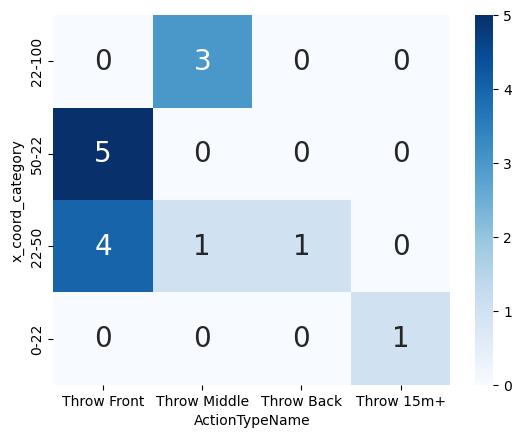

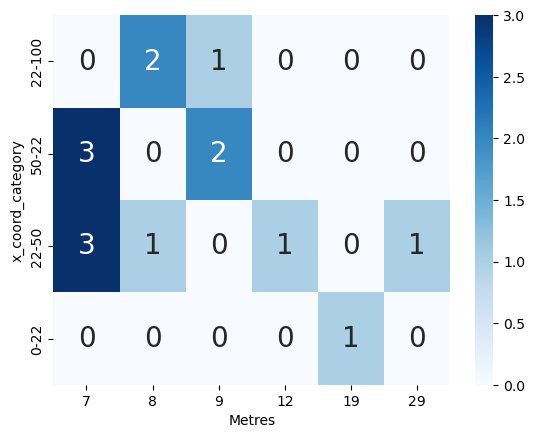

<Figure size 640x480 with 0 Axes>

In [16]:
#TODO エリアごとにラインアウトを整理する
df = df.loc[(df['teamName'] == TEAMNAME)]

dfaction = df.loc[df['actionName'] == 'Lineout Throw']

areas = ['0-22','22-50','50-22','22-100']
Metres_for_area = [0,22,50,73,100]

dfaction['x_coord_category'] = np.nan

for i in range(len(areas)):
    print(i)
    print(areas[i])
    dfaction.x_coord_category[(dfaction['x_coord'].astype(int) < Metres_for_area[i+1]) & (dfaction['x_coord'].astype(int) >= Metres_for_area[i])] = areas[i]

lineout_each_area = pd.crosstab(dfaction['x_coord_category'],dfaction['ActionTypeName'],margins=True).reindex(columns=['Throw Front', 'Throw Middle', 'Throw Back', 'Throw 15m+'],index=list(reversed(areas))).fillna(0)
lineout_each_area
lineout_member_each_area = pd.crosstab(dfaction['x_coord_category'],dfaction['Metres']).reindex(index=list(reversed(areas))).fillna(0)

plt.gcf().subplots_adjust(wspace=4)
sns.heatmap(lineout_each_area,cmap='Blues', annot=True,annot_kws={'size':20})
plt.show()
plt.clf()

plt.gcf().subplots_adjust(wspace=4)
sns.heatmap(lineout_member_each_area,cmap='Blues', annot=True,annot_kws={'size':20})
plt.show()
plt.clf()

/Users/isakakou/Desktop/Optaデータ関連/Six Nations BI CSV Files Apr 2025/941798_IRELvFRAN_BI.csv
/Users/isakakou/Desktop/Optaデータ関連/Six Nations BI CSV Files Apr 2025/941795_WALEvIREL_BI.csv
/Users/isakakou/Desktop/Optaデータ関連/Six Nations BI CSV Files Apr 2025/941797_ITALvFRAN_BI.csv
/Users/isakakou/Desktop/Optaデータ関連/Six Nations BI CSV Files Apr 2025/941802_WALEvENGL_BI.csv
/Users/isakakou/Desktop/Optaデータ関連/Six Nations BI CSV Files Apr 2025/941790_SCOTvITAL_BI.csv
/Users/isakakou/Desktop/Optaデータ関連/Six Nations BI CSV Files Apr 2025/941791_IRELvENGL_BI.csv
/Users/isakakou/Desktop/Optaデータ関連/Six Nations BI CSV Files Apr 2025/941803_FRANvSCOT_BI.csv
/Users/isakakou/Desktop/Optaデータ関連/Six Nations BI CSV Files Apr 2025/941789_FRANvWALE_BI.csv
/Users/isakakou/Desktop/Optaデータ関連/Six Nations BI CSV Files Apr 2025/941792_ITALvWALE_BI.csv
/Users/isakakou/Desktop/Optaデータ関連/Six Nations BI CSV Files Apr 2025/941796_ENGLvSCOT_BI.csv
/Users/isakakou/Desktop/Optaデータ関連/Six Nations BI CSV Files Apr 2025/9

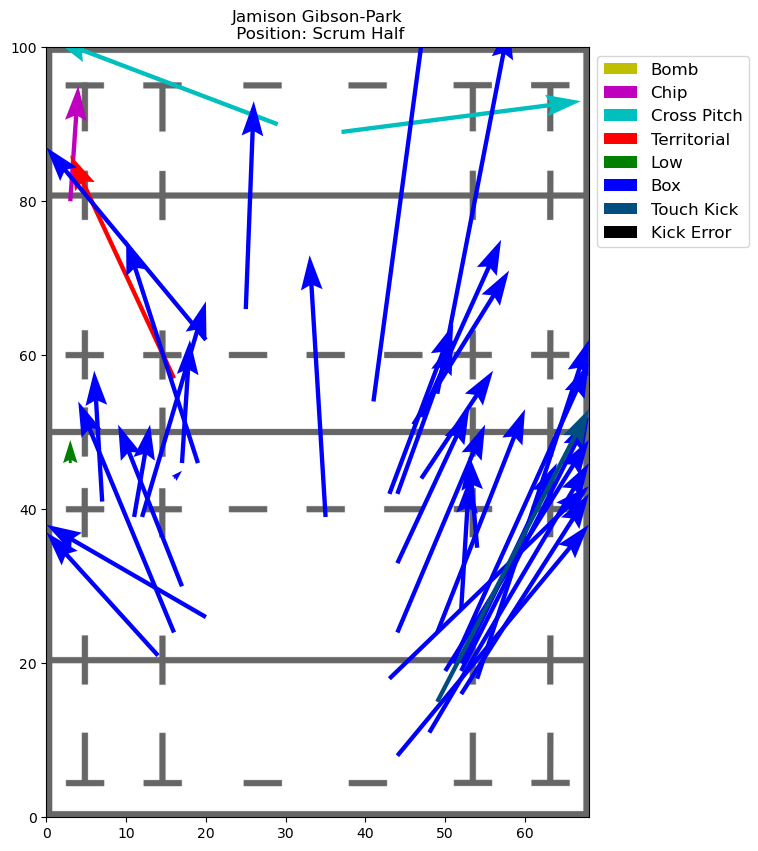

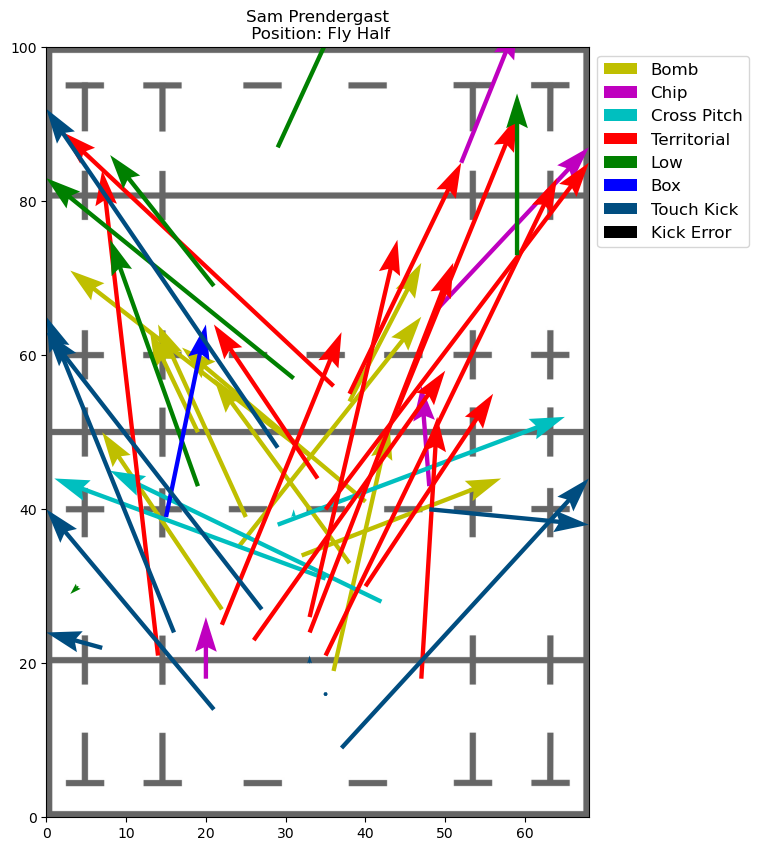

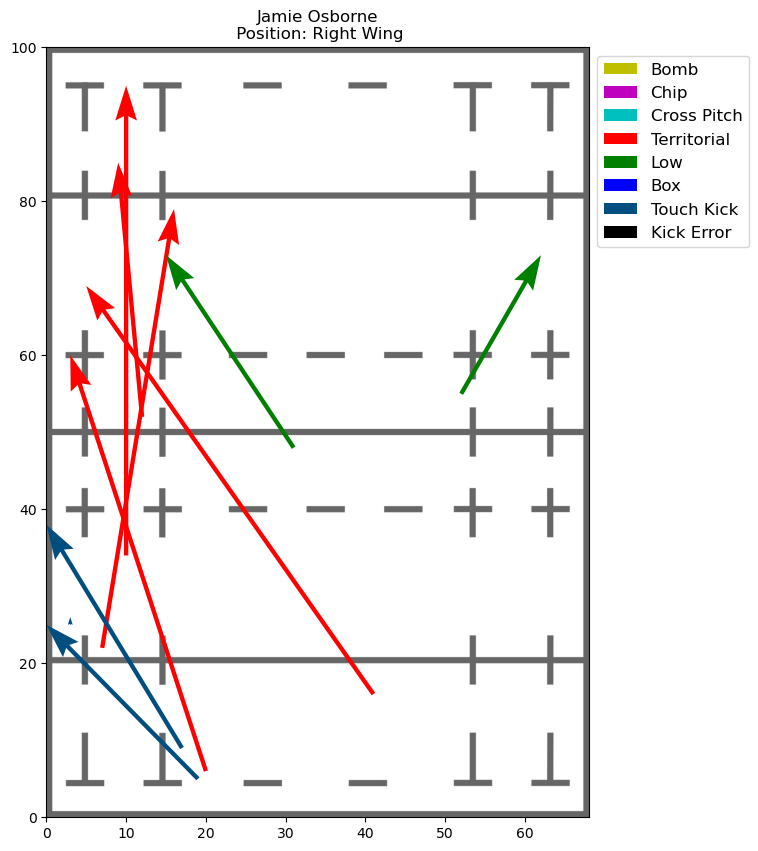

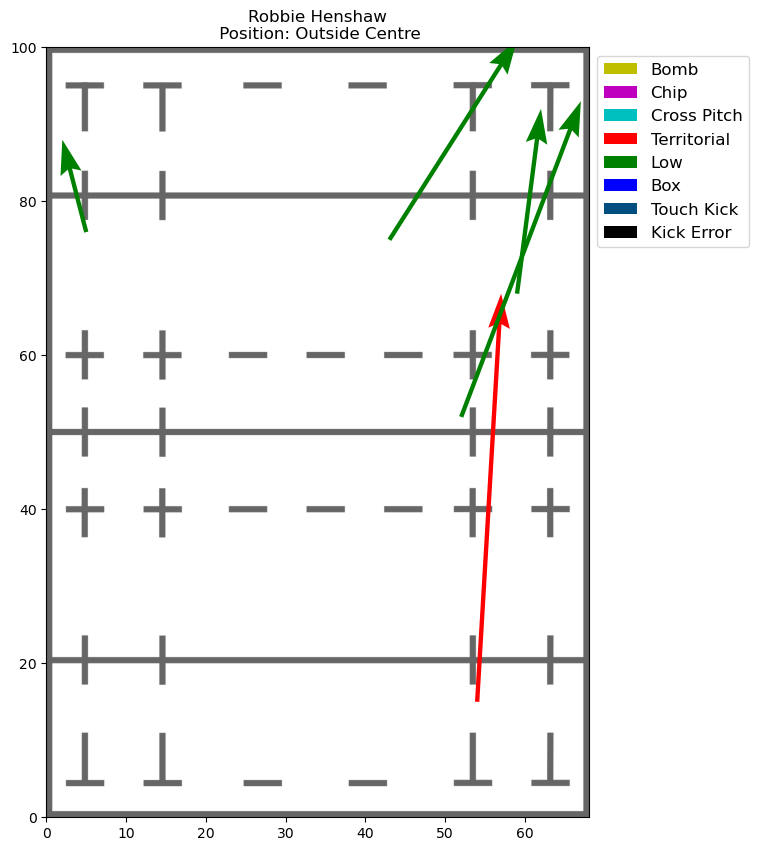

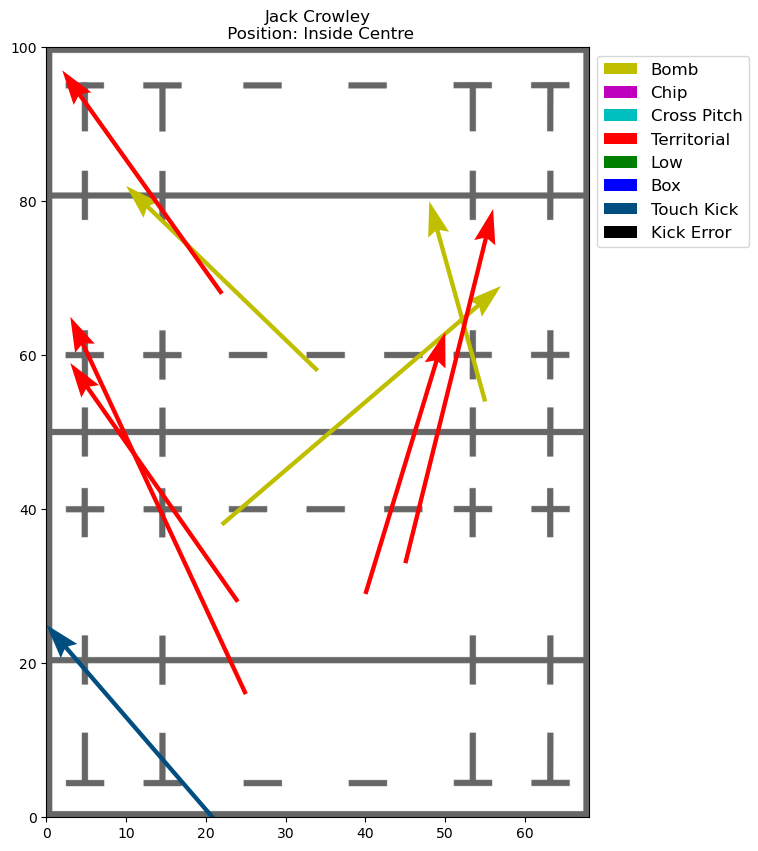

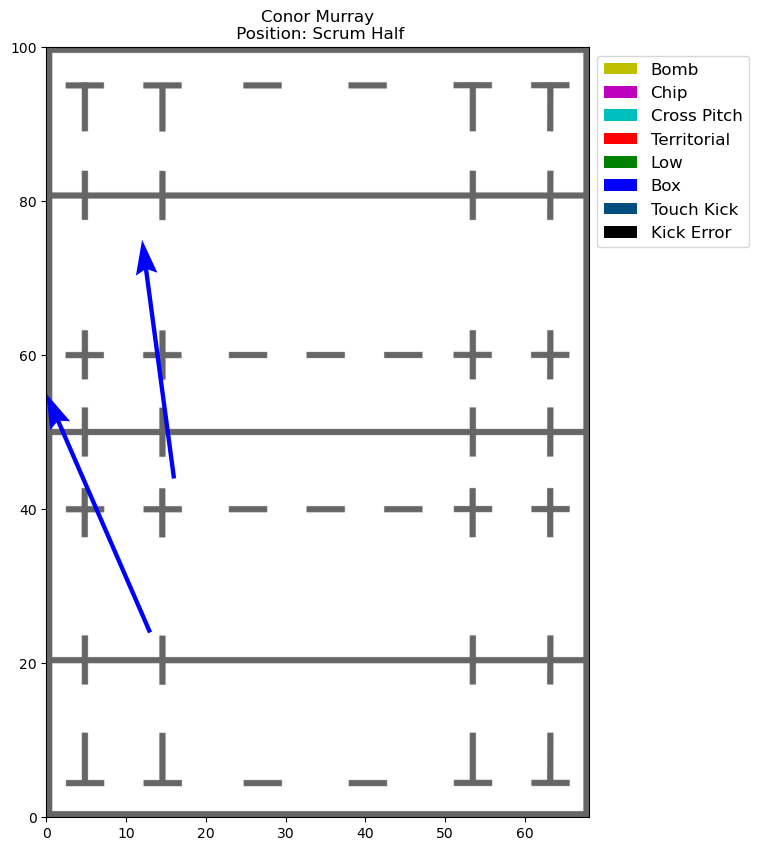

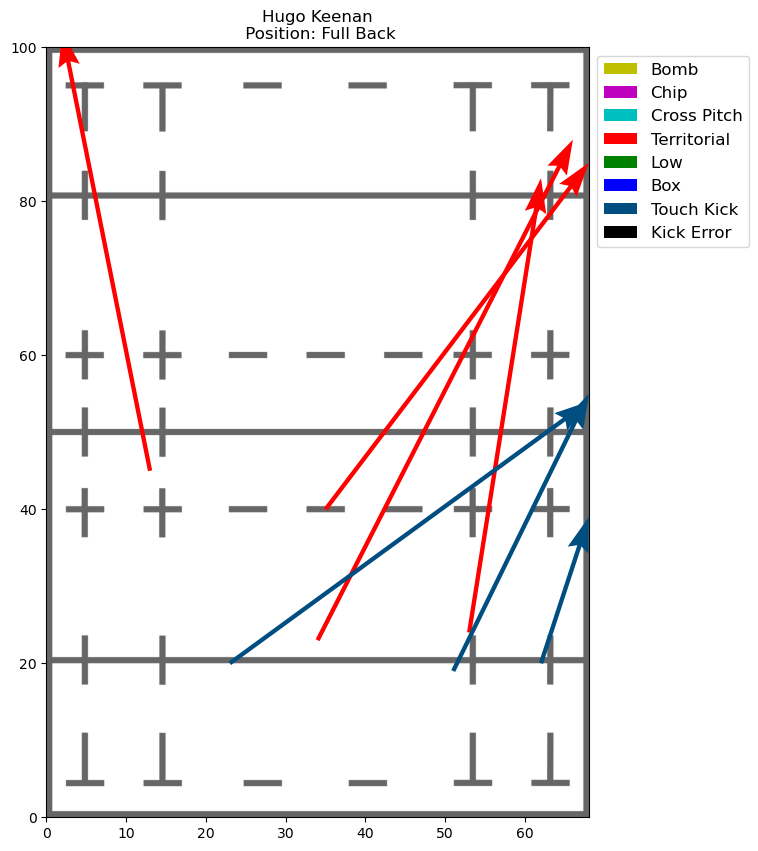

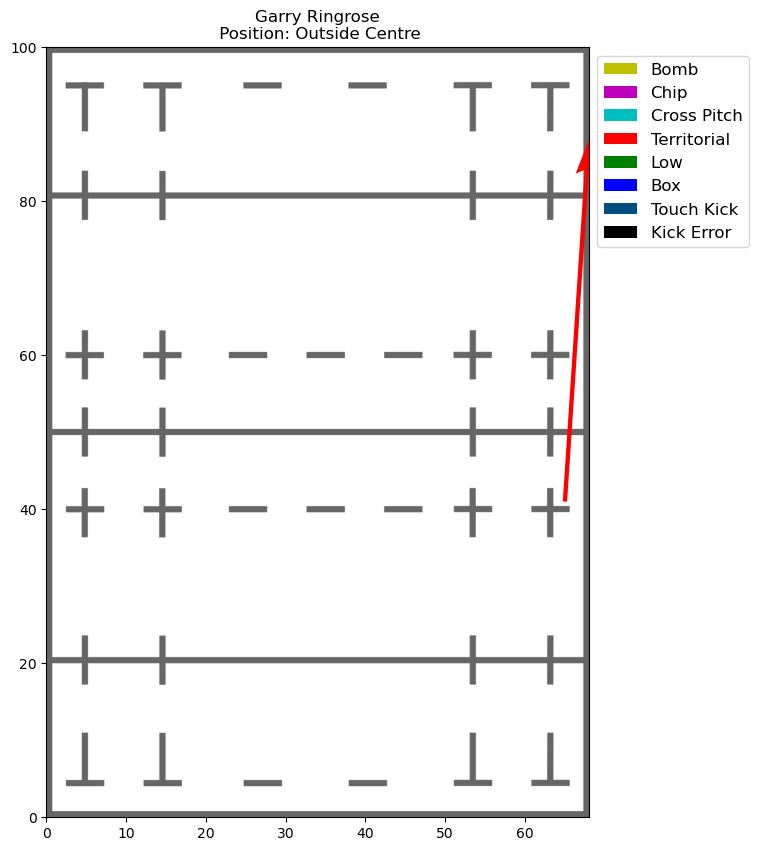

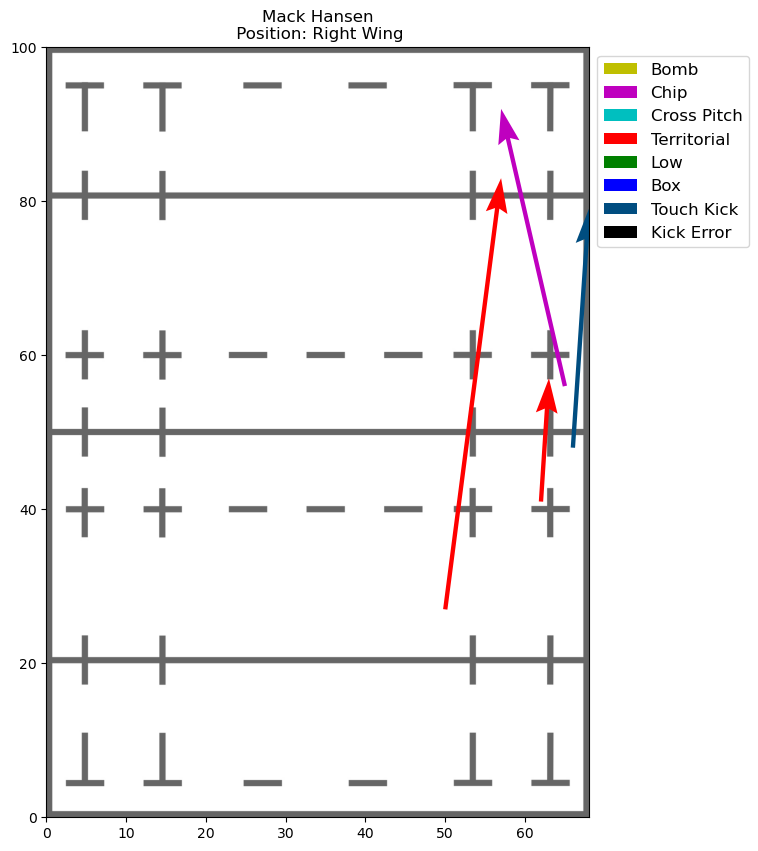

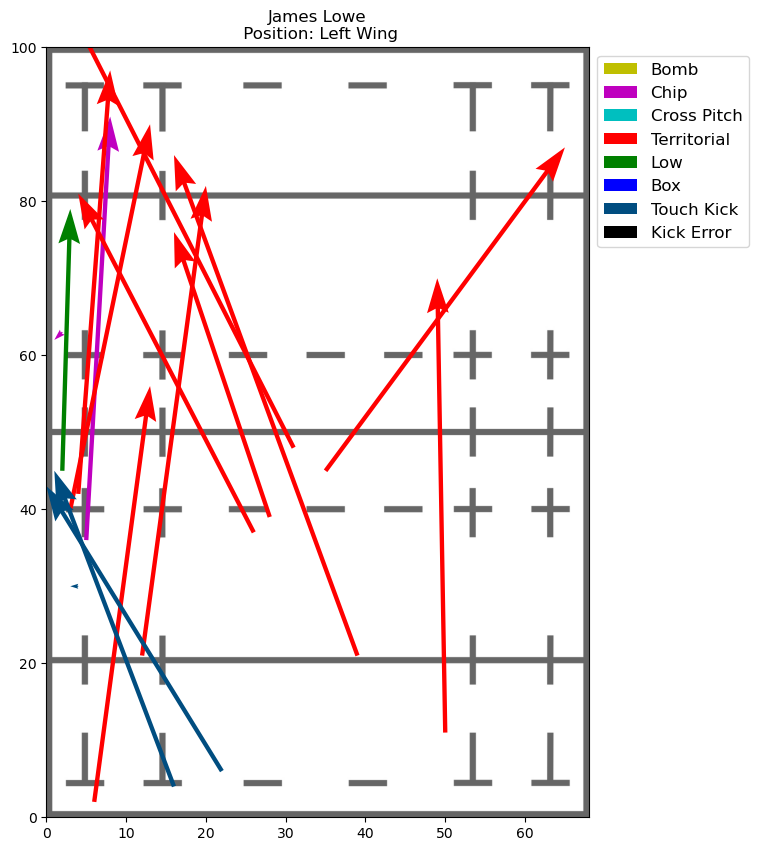

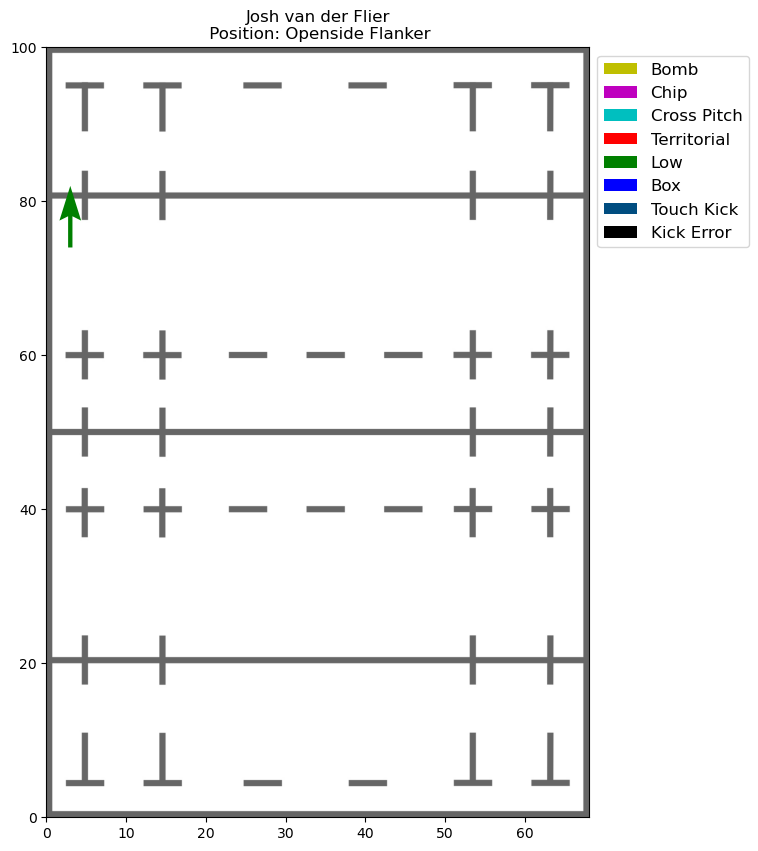

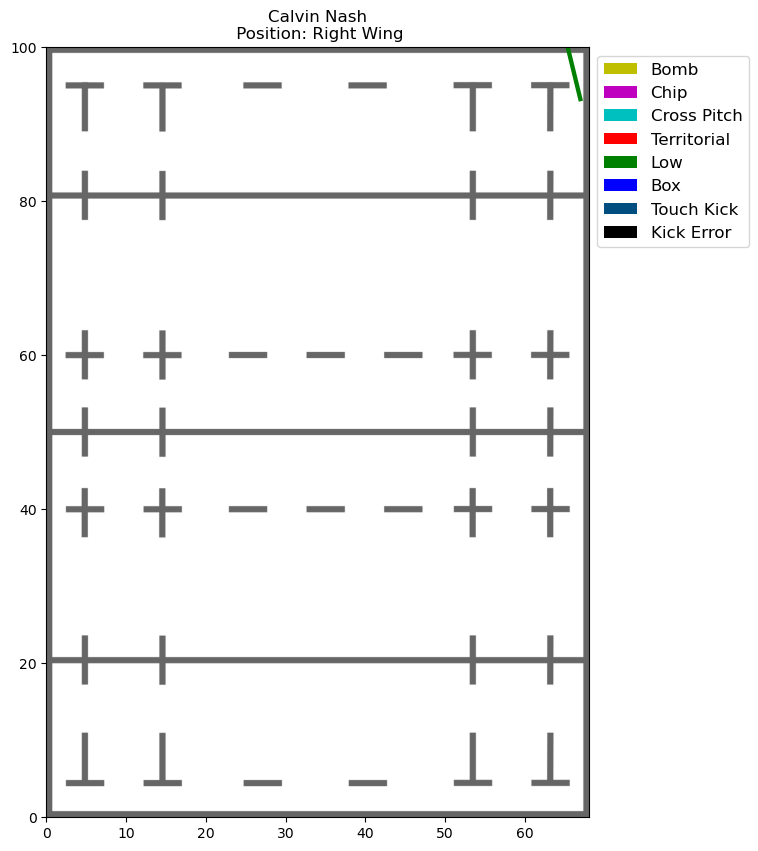

,ActionTypeName,ActionResultName,count,probability
0,Kick Return,Kick in Play,175,0.127180
1,Lineout,Kick in Play,85,0.061773
2,Lineout,Turnover,82,0.059593
3,50m Restart,Kick in Play,77,0.055959
4,Lineout,Pen Won,73,0.053052
...,...,...,...,...
90,Lineout Steal,Scrum,1,0.000727
91,Lineout Steal,Pen Won,1,0.000727
92,Lineout Steal,Pen Con,1,0.000727
93,Free Kick,Pen Con,1,0.000727


          ActionTypeName ActionResultName  count  probability
6                Lineout              Try     59     0.042878
24          Turnover Won              Try     15     0.010901
25                 Scrum              Try     14     0.010174
27           Kick Return              Try     12     0.008721
49               Tap Pen              Try      4     0.002907
65     Goal Line Restart              Try      2     0.001453
87  50m Restart Retained              Try      1     0.000727
89             Free Kick              Try      1     0.000727


ActionResultName,Drop Goal Missed,End of Play,Kick Error,Kick Out of Play,Kick in Goal,Kick in Play,Own Lineout,Pen Con,Pen Won,Scrum,Try,Turnover,Turnover (Scrum)
ActionTypeName,,,,,,,,,,,,,
22m Restart,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000
50m Restart,0.000000,0.013072,0.032680,0.294118,0.000000,0.503268,0.006536,0.045752,0.039216,0.000000,0.000000,0.058824,0.006536
50m Restart Retained,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.083333,0.250000,0.250000,0.166667,0.083333,0.083333,0.000000
Free Kick,0.000000,0.000000,0.000000,0.071429,0.000000,0.214286,0.000000,0.071429,0.214286,0.000000,0.071429,0.357143,0.000000
Goal Line Restart,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.045455,0.227273,0.227273,0.045455,0.090909,0.272727,0.045455
Goal Line Restart Retained,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
Kick Return,0.000000,0.004695,0.023474,0.140845,0.007042,0.410798,0.021127,0.063380,0.082160,0.025822,0.028169,0.131455,0.061033
Lineout,0.002358,0.011792,0.002358,0.058962,0.002358,0.200472,0.002358,0.091981,0.172170,0.021226,0.139151,0.193396,0.101415
Lineout Steal,0.000000,0.000000,0.076923,0.038462,0.000000,0.500000,0.000000,0.038462,0.038462,0.038462,0.000000,0.192308,0.076923


In [7]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import glob

TEAMNAME = 'Ireland'

# パスで指定したファイルの一覧をリスト形式で取得.
csv_files = glob.glob('/Users/isakakou/Desktop/Optaデータ関連/Six Nations BI CSV Files Apr 2025/*.csv')

#読み込むファイルのリストを表示
for a in csv_files:
    print(a)

#csvファイルの中身を追加していくリストを用意
data_list = []

#読み込むファイルのリストを走査
for file in csv_files:
    data_list.append(pd.read_csv(file,encoding='latin1'))
    print(file)

#リストを全て行方向に結合
#axis=0:行方向に結合, sort
df = pd.concat(data_list, axis=0, sort=True)

# df.to_csv("/Users/isakakou/Desktop/22-23_Stats/total.csv",index=False)

#Kickが入力された場合の処理-----
dfaction = df.loc[(df['teamName'] == TEAMNAME)]

dfaction = dfaction.loc[dfaction['actionName'] == 'Kick']
kicktypes = ['Bomb', 'Chip', 'Cross Pitch', 'Territorial', 'Low', 'Box', 'Touch Kick','Kick Error']
kicks = dfaction.loc[dfaction['qualifier3'] != 148]

cl = ['y','m', 'c', 'r', 'g', 'b', (0,0.3,0.5), (0,0,0)]
players = kicks.drop_duplicates(subset=['playerName'],keep='first')
player_list = players['playerName'].reset_index(drop=True)
print(player_list)

for p in range(len(player_list)):
    fig = plt.figure(figsize=(7, 10))
    ax = fig.add_subplot(1, 1,1)
    plt.xlim(0, 68)
    plt.ylim(0,100)
    for i in range(len(kicktypes)):
        plts = kicks.loc[(kicks['ActionTypeName']== kicktypes[i])&(kicks['playerName'] == player_list[p])]
        plt.quiver(plts['y_coord'], plts["x_coord"], (plts['y_coord_end']-plts['y_coord']), (plts["x_coord_end"]-plts['x_coord']), angles="xy", scale_units='xy',label= kicktypes[i], color = cl[i], scale=1,width=0.008, headwidth=5, headlength = 8, headaxislength = 7, pivot='tail')
    #Kickの処理ここまで------

    #背景画像の設定
    fig.patch.set_facecolor('white')
    im = Image.open(os.getcwd()+"/Resources/FIELD_image.jpeg")
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    plt.imshow(im, extent=[*xlim, *ylim], aspect='auto', alpha=0.6)
    position = dfaction.loc[dfaction['playerName'] == player_list[p]]['playerpositionName'].drop_duplicates(keep='first').reset_index(drop=True)

    #ラベルの表示
    lgd = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)
    plt.title(player_list[p] + "\n Position: " + position[0])
    plt.gcf().subplots_adjust(wspace=4)
    plt.show()
    
    
# 接点無双度計測
def at_settenmusou(TEAMNAME):
    dfaction = df.loc[(df['teamName'] == TEAMNAME)]
    carries = dfaction.loc[dfaction['actionName'] == 'Carry']
    musou = carries.loc[(carries["qualifier4Name"] == 'Dominant Contact') | (carries["qualifier4Name"] == 'Neutral Contact')]
    print(f"{TEAMNAME} AT接点無双度: {len(musou)/len(carries)*100}%")
    
def df_settenmusou(TEAMNAME):
    team_df = df.loc[(df['homeTeamName'] == TEAMNAME) | (df['awayTeamName'] == TEAMNAME)]
    dfaction = team_df.loc[(team_df['teamName'] != TEAMNAME)]
    carries = dfaction.loc[dfaction['actionName'] == 'Carry']
    musou = carries.loc[(carries["qualifier3Name"] == 'Neutral Gain line') | (carries["qualifier3Name"] == 'Failed Gain line')]
    print(f"{TEAMNAME} DF接点無双度: {len(musou)/len(carries)*100}%")
    
#SIX_NATIONS_TEAMS = ["France", "Ireland", "England", "Scotland", "Wales", "Italy"]
#for team in SIX_NATIONS_TEAMS:
    #at_settenmusou(team)
    #df_settenmusou(team)
    
def calc_possession_start_end_probability(df):
    # Possession アクションだけを抽出
    df_possession = df[df["actionName"] == "Possession"]

    # 開始と終了のペアを作成
    pair_counts = df_possession.groupby(["ActionTypeName", "ActionResultName"]).size().reset_index(name="count")

    # 総数で割って確率に変換
    total_possessions = pair_counts["count"].sum()
    pair_counts["probability"] = (pair_counts["count"] / total_possessions)

    # 結果をソートして見やすく
    pair_counts = pair_counts.sort_values(by="probability", ascending=False).reset_index(drop=True)

    return pair_counts

def calc_possession_probability_crosstab(df):
    # Possession のみに絞る
    df_possession = df[df["actionName"] == "Possession"]

    # 各 (ActionTypeName, ActionResultName) の出現回数をカウント
    crosstab_count = pd.crosstab(df_possession["ActionTypeName"], df_possession["ActionResultName"])

    # 各行（ActionTypeName）ごとの合計で割って、確率を計算
    crosstab_prob = crosstab_count.div(crosstab_count.sum(axis=1), axis=0)

    return crosstab_prob

pair_counts = calc_possession_start_end_probability(df)
display(pair_counts)
# 各ポゼッション起点がトライに繋がる確率
print(pair_counts.loc[pair_counts["ActionResultName"] == "Try"])
# クロス集計表として表示
display(calc_possession_probability_crosstab(df))

def calc_possession_value_model():
    #FXIDが同じでPLIDがチームのものについて、特定のアクションから特定のアクションに移行する確率を計算する
    print("いつかやる")